**Chapter 2 – End-to-end Machine Learning project**

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*



<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

Here are the main steps you will go through:

1. Look at the big picture. 
2. Get the data. 
3. Discover and visualize the data to gain insights. 
4. Prepare the data for Machine Learning algorithms. 
5. Select a model and train it. 
6. Fine-tune your model. 
7. Present your solution. 
8. Launch, monitor, and maintain your system.

**Working with Real Data**

When  you are learning about Machine Learning, it is best to experiment with realworld data, not artificial datasets. Fortunately, there are thousands of open datasets to choose from, ranging across all sorts of domains. Here are a few places you can look to get data:

*Popular open data repositories* 

— UC Irvine Machine Learning Repository (http://archive.ics.uci.edu/ml/index.php) 

— Kaggle datasets (https://www.kaggle.com/datasets) 

— Amazon’s AWS datasets 


*Meta portals (they list open data repositories) 

— Data Portals 

— OpenDataMonitor 

— Quandl



In this chapter we’ll use the California Housing Prices dataset
<div>

</div>



**Look at the Big Picture**

Welcome to the Machine Learning Housing Corporation! Your first task is to use California census data to build a model of housing prices in the state.

**Frame the Problem**
<div>
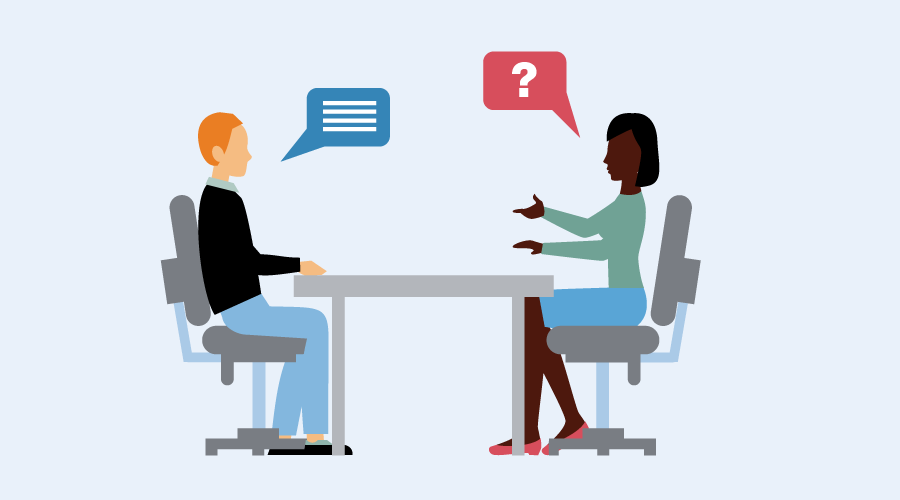
</div>

The first question to ask your boss is what exactly the business objective is.

How does the company expect to use and benefit from this model?

Knowing the objective is important because it will determine how you frame the problem, which algorithms you will select, which performance measure you will use to evaluate your model, and how much effort you will spend tweaking it.

**Answer:** Your model’s output is a **prediction of a district’s median housing price**.Your model **out put** will be **fed** to **another ML** sytem, along with **many other signals**. This downstream system will determine wether it is worth **investing** in a given area or not. 

Getting this right is critical, as it directly affects revenue.

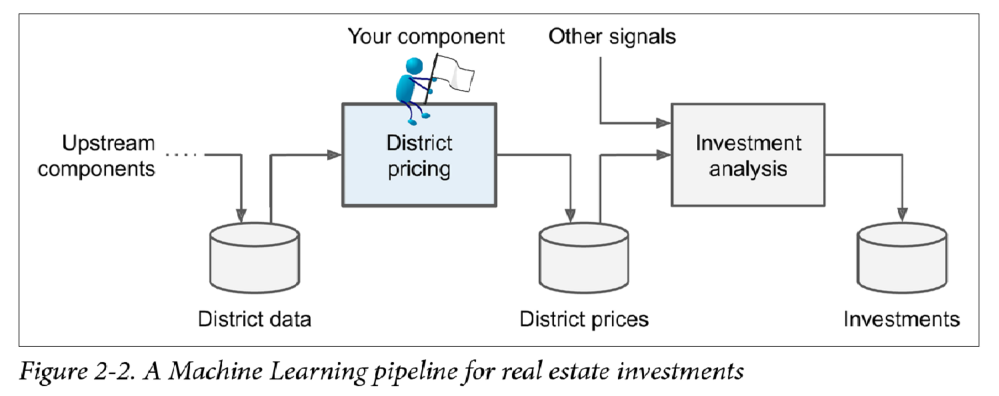

# Pipelines

A sequence of data processing components is called data **pipline**. Piplines are very common in ML systems, since there is a lot of data manipulate and many data transformations to apply.

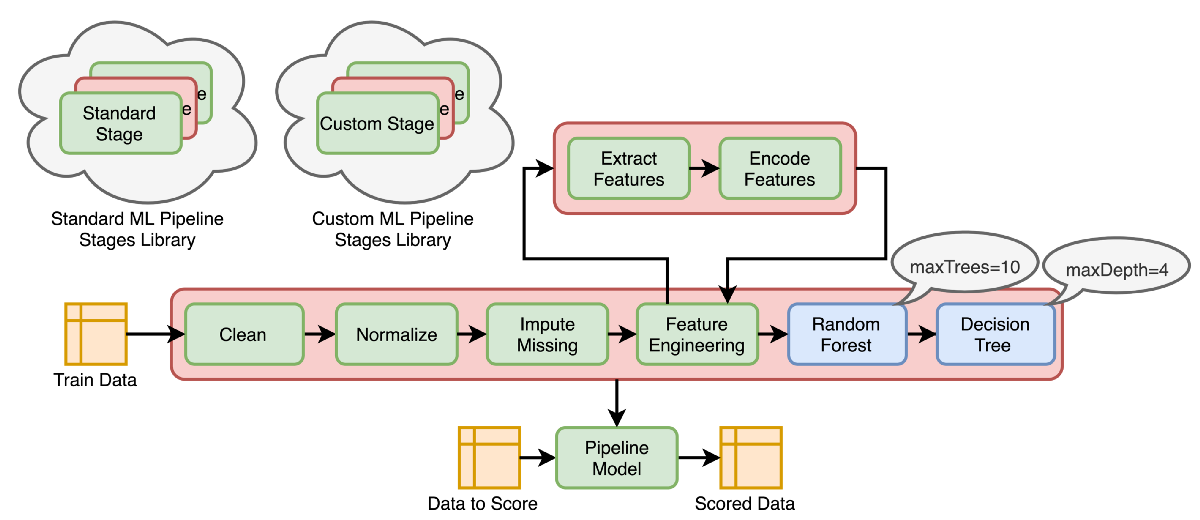

The next question to ask your boss is what the current solution looks like (if any). 

The current situation will often give you a reference for performance, as well as insights on how to solve the problem. 

**Answer**: The district housing prices are currently estimated manually by experts: a team gathers up-to-date information about a district, and when they cannot get the median housing price, they estimate it using complex rules.

This is costly and time-consuming, and their estimates are not great; in cases where they manage to find out the actual median housing price, they often realize that their estimates were off by more than 20%. This is why the company thinks that it would be useful to train a model to predict a district’s median housing price,

With all this information, you are now ready to start designing your system.

Frist, you need to frame the problem.

. Is **supervised** or **unsupervised**?

. Is it a **classification** task, or a **regression** task or something else?

. Should you use **batch learning** or **online learning**?



**Let's pause and try to answer these quastions for yourself.**


****Select a Performance Measure****

Your next step is to select a performance measure.

A typical performance measure for regression problem is the **Root Mean Square Error (RMSE)**.

It gives an idea of how much error the system typically makes in the prediction.


<div>
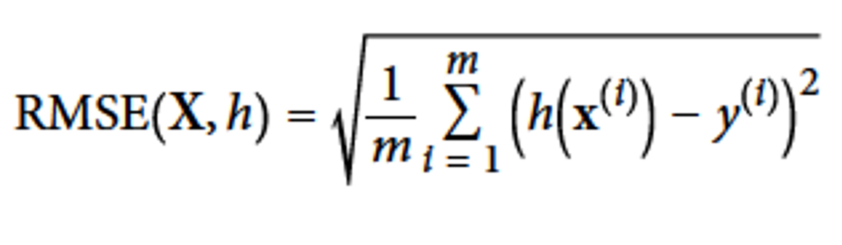
</div>

**m**  is the number of instances in the dataset 

**x ( i )**  is a vector of all the feature values 

**X** is a matrix containig all the feature values (excluding labels) of all instances in the dataset

**h**  is your system’s prediction function, also called a hypothesis .

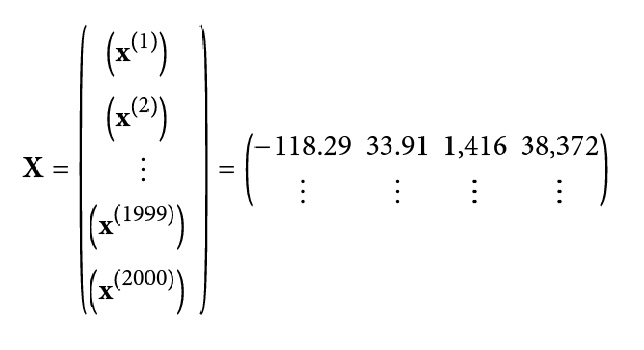




<div>
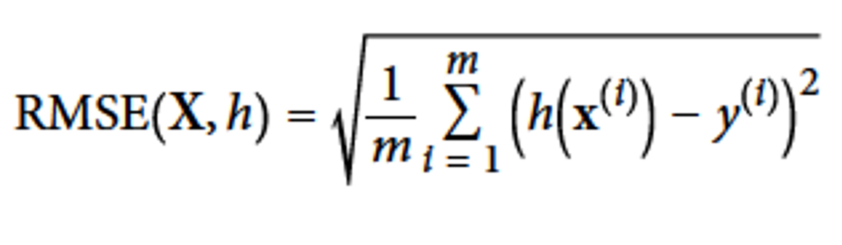
</div>

You may prefer to use another function, for example: **mean absolute error (MAE)**
<div>
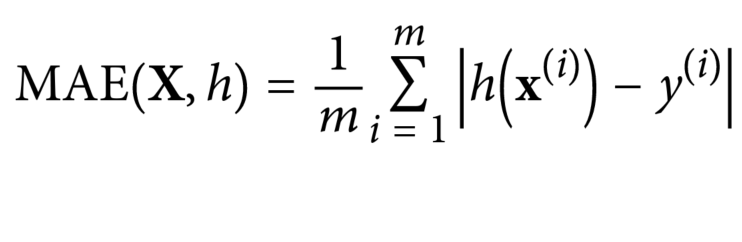
</div>

Both the RMSE and the MAE are ways to measure the distance between two vectors: the vector of predictions and the vector of target values.

<div>
    <center>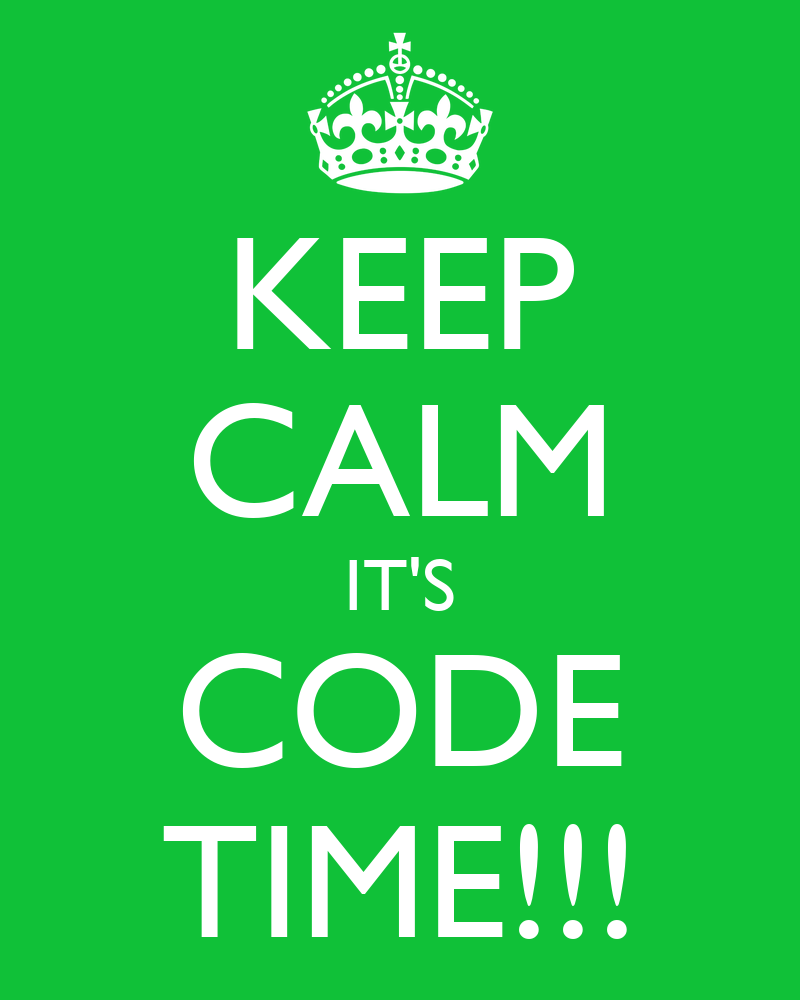</center>
</div>

Here are the main steps you will go through:

1. Look at the big picture. 
2. Get the data. 
3. Discover and visualize the data to gain insights. 
4. Prepare the data for Machine Learning algorithms. 
5. Select a model and train it. 
6. Fine-tune your model. 
7. Present your solution. 
8. Launch, monitor, and maintain your system.

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
# sys function provides the name of the existing python modules which have been imported. 
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



The full Jupyter notebook is available at https://github.com/ageron/handson-ml2 .

# Getting the Data

## Download the Data

In this project, you will just download a single compressed file, housing.tgz , which contains a comma-separated values (CSV) file called *housing.csv*  with all the data.

You could use your web browser to download the file and run tar xzf housing.tgz to decompress it and extract the CSV file

But it is preferable to create a small function to do that. Having a function that downloads the data is useful in particular if the data changes regularly: you can write a small script that uses the function to fetch the latest data 

Here is the function to fetch the data:

In [2]:
# fetching a zip file from a specefic url, storying it in a specefic path, opening and extarxting the file
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
    

In [3]:
fetch_housing_data()


Load the data using Pandas:

In [4]:
# Loading data from our system to a Panda's dataframe
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


## Take a Quick Look at the Data Structure

In [5]:
# housing is our dataframe
housing = load_housing_data()
housing.head()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

The *info()* method is useful to get a quick discription of data

In [6]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


. 20,640 instances in the dataset

. Total_bed rooms  attribute has only 20,433 nonnull values, meaning that 207 districts are missing this feature. 

. We will need to take care of this later.

. All attributes are numerical, except the *ocean_proximity  field*.

. It is probably a categorical attribute.

You can find out what categories exist and how many districts belong to each category by using the *value_counts()*  method:

In [7]:
housing["ocean_proximity"].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Let’s look at the other fields. The *describe()*  method shows a summary of the numerical attributes

In [8]:
housing.describe()


longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

Another quick way to get a feel of the type of data you are dealing with is to plot a *histogram* for each numerical attribute.

A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis)

## Importance of a Histogram
Creating a histogram provides a visual representation of data distribution. Histograms can display a large amount of data and the frequency of the data values. The median and distribution of the data can be determined by a histogram. In addition, it can show any outliers or gaps in the data.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

Saving figure attribute_histogram_plots


There are a few things you might notice in these histograms:

. First, the median income attribute does not look like it is expressed in US dollars (e.g., 3 actually means about $30,000).

. These attributes have very different scales.

. Many histograms are tail-heavy : they extend much farther to the right of the median than to the left.

# Split data set
<div>
    <center>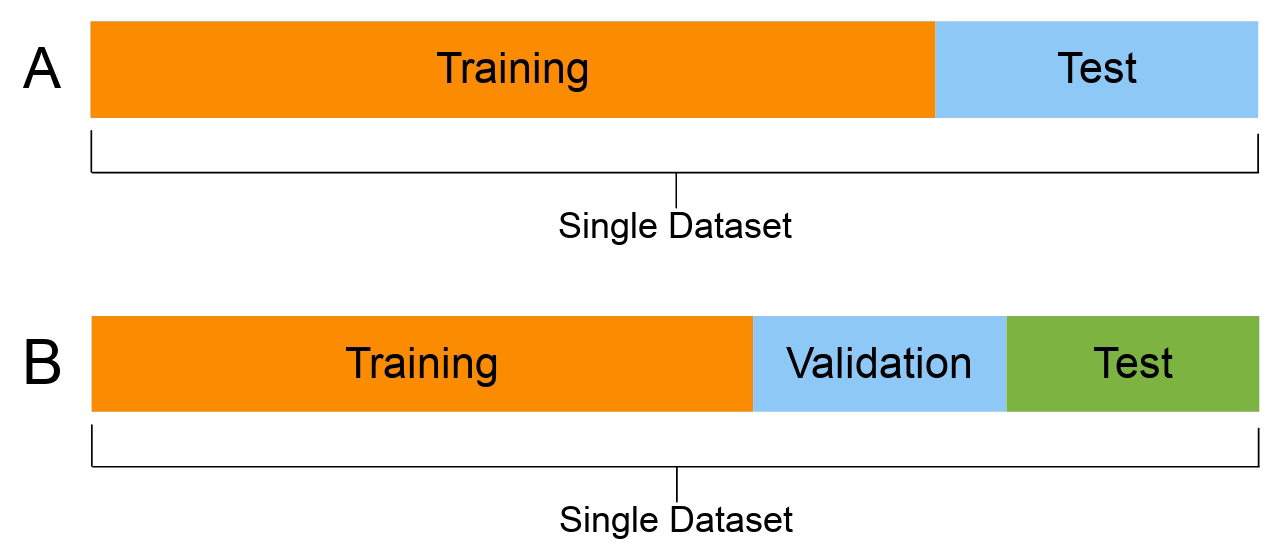</center>
</div>

## Create a Test Set.

It  may sound strange to voluntarily set aside part of the data at this stage.


Pick some instances **randomly**, typically 20% of the dataset (or **less** if your dataset is **very large**), and set them aside:

In [10]:
# to make this notebook's output identical at every run to always generates the same shuffled indices
np.random.seed(42)


In [11]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [12]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)


16512

In [13]:
len(test_set)


4128

Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. 

The simplest function is train_test_split()

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [15]:
test_set.head()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                25.0       1505.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
15663    -122.44     37.80                52.0       3830.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   
9814     -121.93     36.62                34.0       2351.0             NaN   

       population  households  median_income  median_house_value  \
20046      1392.0       359.0         1.6812             47700.0   
3024       1565.0       584.0         2.5313             45800.0   
15663      1310.0       963.0         3.4801            500001.0   
20484      1705.0       495.0         5.7376            218600.0   
9814       1063.0       428.0         3.7250            278000.0   

      ocean_proximity  
20046          INLAND  
3024           INLAND  
15663        NEAR BAY  
20484       <1H OCEAN  
9814       NEAR OCEAN

Suppose you chatted with experts who told you that the **median income** is a very important attribute to predict median housing prices. 

You may want to ensure that the test set is representative of the various categories of incomes in the whole dataset.

Since the median income is a continuous numerical attribute, you first need to create an income category attribute. Let’s look at the median income histogram more closely

In [16]:
housing["median_income"].hist()


<AxesSubplot:>

The following code uses the pd.cut()  function to create an income category attribute with five categories (labeled from 1 to 5): 

category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from 1.5 to 3, and so on

In [17]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


In [18]:
housing["income_cat"].value_counts()


3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

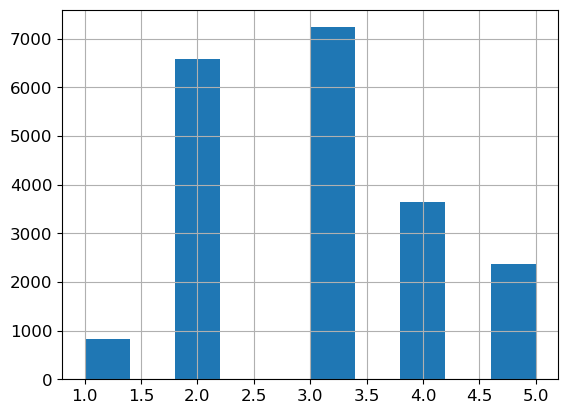

In [19]:
housing["income_cat"].hist()


Now  you are ready to do stratified sampling based on the income category. 

We use this method to ensure that we will get 20\% of all categories in the "income_cat" in our testset.

For this you can use Scikit-Learn’s **StratifiedShuffleSplit**  class:

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Let’s see if this worked as expected. You can start by looking at the income category proportions in the test set:

In [21]:
strat_test_set["income_cat"].value_counts()


3    1447
2    1316
4     728
5     472
1     165
Name: income_cat, dtype: int64

In [22]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

Now you should remove the **income_cat**  attribute so the data is back to its original state

In [23]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
    

# Discover and Visualize the Data to Gain Insights

Let’s create a copy so that you can play with it without harming the training set:

In [24]:
housing = strat_train_set.copy()


## Visualizing Geographical Data

Since  there is geographical information (latitude and longitude), it is a good idea to create a scatterplot of all districts to visualize the data. It shows the housing distributions.

Saving figure bad_visualization_plot


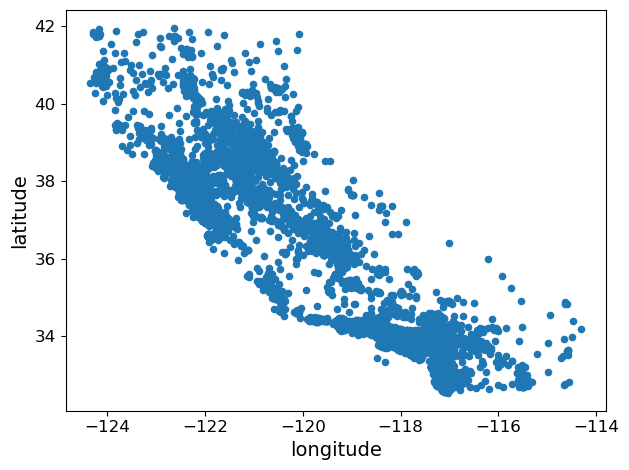

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

This looks like California all right, but other than that it is hard to see any particular pattern. 

Setting the **alpha**  option to **0.1**  makes it much easier to visualize the places where there is a high density of data points

Saving figure better_visualization_plot


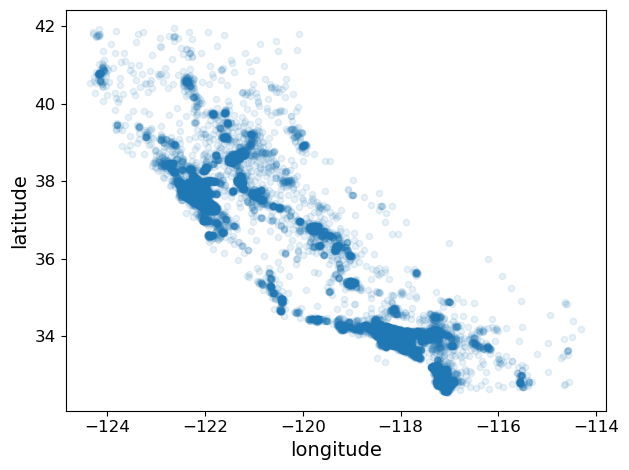

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611 ). Thanks to Wilmer Arellano for pointing it out.

Now let’s look at the housing prices

The radius of each circle represents the district’s population (option s ), and the color represents the price (option c ). We will use a predefined color map (option cmap ) called jet , which ranges from blue (low values) to red (high prices):

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

Saving figure housing_prices_scatterplot


This image tells you that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density, as you probably knew already.

In [28]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x1d71559f850>)

Saving figure california_housing_prices_plot


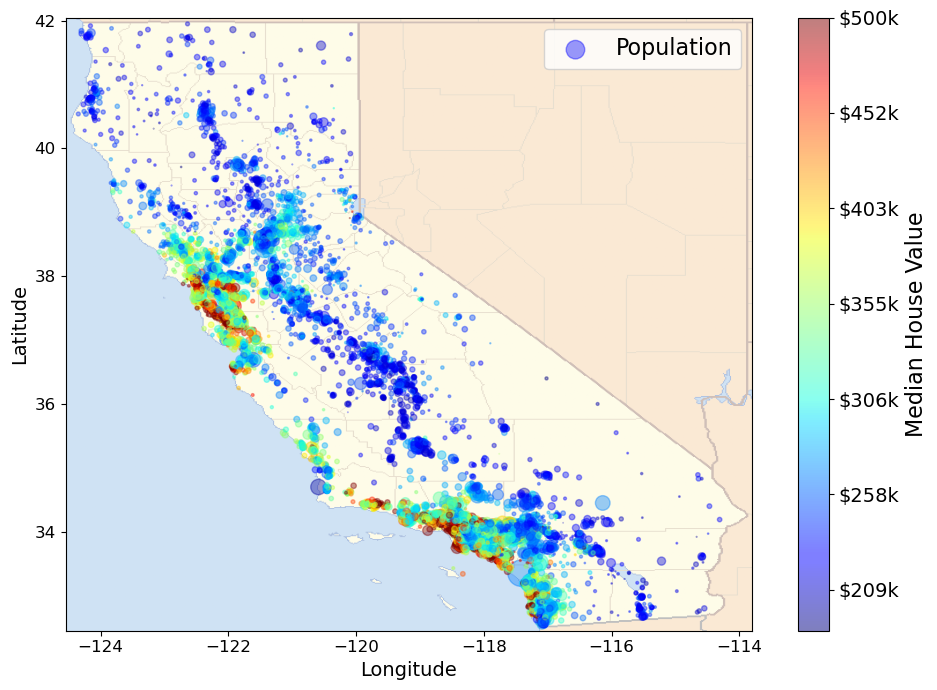

In [29]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

## Looking for Correlations

What is correlation?

https://www.youtube.com/watch?v=dsyTQNUvqH0

Since  the dataset is not too large, you can easily compute the standard correlation coefficient  (also called Pearson’s r ) between every pair of attributes using the corr() method:

In [30]:
corr_matrix = housing.corr()


Now let’s look at how much each attribute correlates with the median house value:

In [31]:
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up.

When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north)

Finally, coefficients close to 0 mean that there is no linear correlation.

This figure shows various plots along with the correlation coefficient between their horizontal and vertical axes.
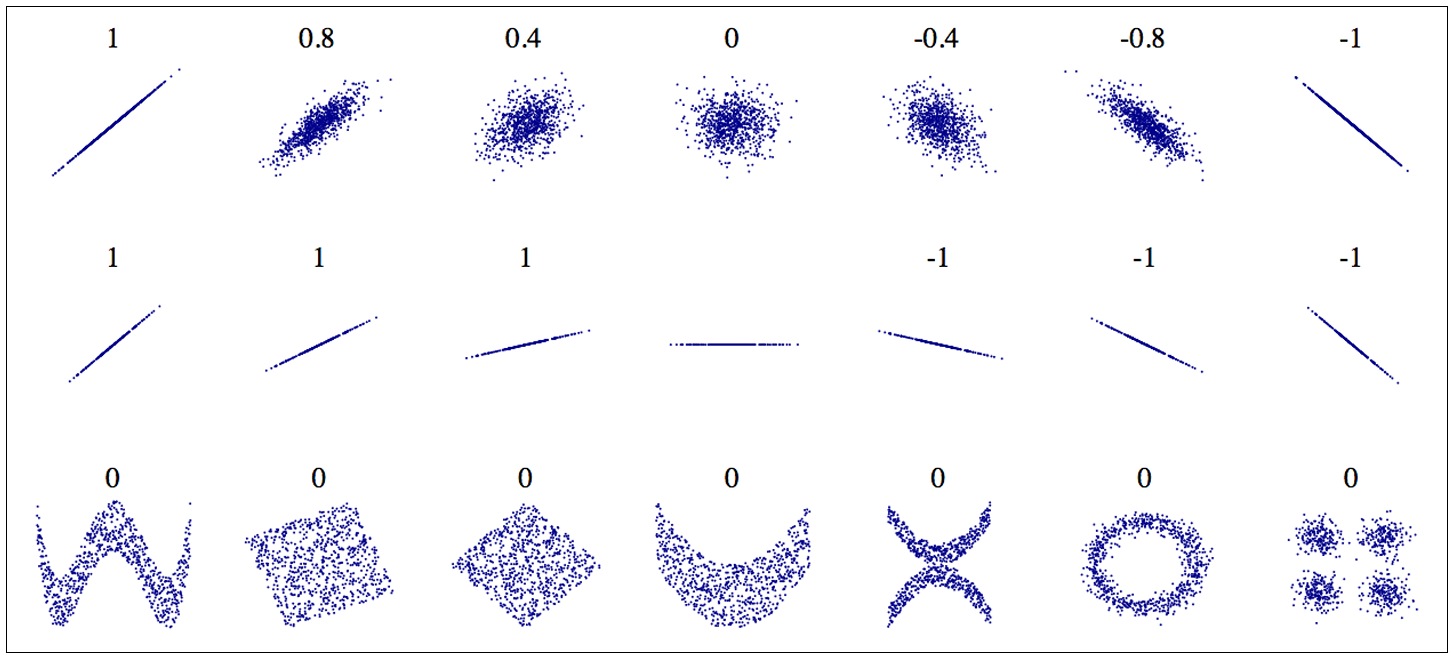

Another way to check for correlation between attributes is to use the pandas scatter_matrix()  function, which plots every numerical attribute against every other numerical attribute. Since there are now 11 numerical attributes, you would get 11 ** 2  = 121 plots, which would not fit on a page—so let’s just focus on a few promising attributes that seem most correlated with the median housing value

In [32]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")



Saving figure scatter_matrix_plot


The most promising attribute to predict the median house value is the median income, so let’s zoom in on their correlation scatterplot

Saving figure income_vs_house_value_scatterplot


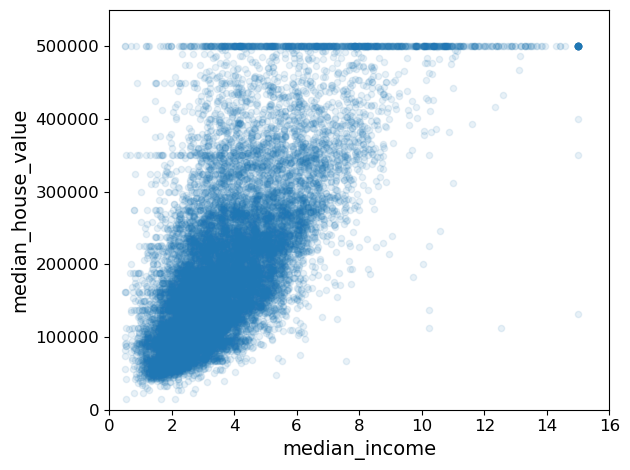

In [33]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

## Experimenting with Attribute Combinations

One last thing you may want to do before preparing the data for Machine Learning algorithms is to try out various attribute combinations. 

For example, the **total number of rooms** in a district is not very useful if you don’t know **how many households** there are. What you **really want** is the **number of rooms per household**. 

Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at. Let’s create these new attributes:

In [34]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


And now let’s look at the correlation matrix again:

In [35]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

Hey, not bad! The new bedrooms_per_room  attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive.

In [36]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [37]:
housing.describe()


longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.575635     35.639314           28.653404   2622.539789   
std        2.001828      2.137963           12.574819   2138.417080   
min     -124.350000     32.540000            1.000000      6.000000   
25%     -121.800000     33.940000           18.000000   1443.000000   
50%     -118.510000     34.260000           29.000000   2119.000000   
75%     -118.010000     37.720000           37.000000   3141.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    16354.000000  16512.000000  16512.000000   16512.000000   
mean       534.914639   1419.687379    497.011810       3.875884   
std        412.665649   1115.663036    375.696156       1.904931   
min          2.000000      3.000000      2.000000       0.499900   
25%        295.000000    784.000000    279.000000       2.566950   
50%        433.000000   1164.000000    408.000000       3.541550   
75%        644.000000   1719.000000    602.000000       4.745325   
max       6210.000000  35682.000000   5358.000000      15.000100   

       median_house_value  rooms_per_household  bedrooms_per_room  \
count        16512.000000         16512.000000       16354.000000   
mean        207005.322372             5.440406           0.212873   
std         115701.297250             2.611696           0.057378   
min          14999.000000             1.130435           0.100000   
25%         119800.000000             4.442168           0.175304   
50%         179500.000000             5.232342           0.203027   
75%         263900.000000             6.056361           0.239816   
max         500001.000000           141.909091           1.000000   

       population_per_household  
count              16512.000000  
mean                   3.096469  
std                   11.584825  
min                    0.692308  
25%                    2.431352  
50%                    2.817661  
75%                    3.281420  
max                 1243.333333

# Prepare the Data for Machine Learning Algorithms

It’s  time to prepare the data for your Machine Learning algorithms. Instead of doing this manually, you should write functions for this purpose, for several good reasons: 

• This will allow you to reproduce these transformations easily on any dataset (e.g., the next time you get a fresh dataset). 

• You will gradually build a library of transformation functions that you can reuse in future projects. 

• You can use these functions in your live system to transform the new data before feeding it to your algorithms.

• This will make it possible for you to easily try various transformations and see which combination of transformations works best.


But first let’s revert to a clean training set (by copying strat_train_set  once again). Let’s also separate the predictors and the labels, since we don’t necessarily want to apply the same transformations to the predictors and the target values (note that drop()  creates a copy of the data and does not affect strat_train_set )

In [38]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()


## Data Cleaning

Most  Machine Learning algorithms cannot work with missing features, so let’s create a few functions to take care of them. We saw earlier that the total_bedrooms attribute has some missing values, so let’s fix this. You have three options: 

1. Get rid of the corresponding districts (remove **instances**). 

2. Get rid of the whole attribute (**remove the feature**). 

3. Set the values to some value (zero, the mean, the median, etc.).

In [39]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1606     -122.08     37.88                26.0       2947.0             NaN   
10915    -117.87     33.73                45.0       2264.0             NaN   
19150    -122.70     38.35                14.0       2313.0             NaN   
4186     -118.23     34.13                48.0       1308.0             NaN   
16885    -122.40     37.58                26.0       3281.0             NaN   

       population  households  median_income ocean_proximity  
1606        825.0       626.0         2.9330        NEAR BAY  
10915      1970.0       499.0         3.4193       <1H OCEAN  
19150       954.0       397.0         3.7813       <1H OCEAN  
4186        835.0       294.0         4.2891       <1H OCEAN  
16885      1145.0       480.0         6.3580      NEAR OCEAN

In the book 3 options are listed:

```python
housing.dropna(subset=["total_bedrooms"])    # option 1
housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

To demonstrate each of them, let's create a copy of the housing dataset, but keeping only the rows that contain at least one null. Then it will be easier to visualize exactly what each option does:

In [40]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1


Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity]
Index: []

In [41]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2


longitude  latitude  housing_median_age  total_rooms  population  \
1606     -122.08     37.88                26.0       2947.0       825.0   
10915    -117.87     33.73                45.0       2264.0      1970.0   
19150    -122.70     38.35                14.0       2313.0       954.0   
4186     -118.23     34.13                48.0       1308.0       835.0   
16885    -122.40     37.58                26.0       3281.0      1145.0   

       households  median_income ocean_proximity  
1606        626.0         2.9330        NEAR BAY  
10915       499.0         3.4193       <1H OCEAN  
19150       397.0         3.7813       <1H OCEAN  
4186        294.0         4.2891       <1H OCEAN  
16885       480.0         6.3580      NEAR OCEAN

In [42]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3


In [43]:
sample_incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1606     -122.08     37.88                26.0       2947.0           433.0   
10915    -117.87     33.73                45.0       2264.0           433.0   
19150    -122.70     38.35                14.0       2313.0           433.0   
4186     -118.23     34.13                48.0       1308.0           433.0   
16885    -122.40     37.58                26.0       3281.0           433.0   

       population  households  median_income ocean_proximity  
1606        825.0       626.0         2.9330        NEAR BAY  
10915      1970.0       499.0         3.4193       <1H OCEAN  
19150       954.0       397.0         3.7813       <1H OCEAN  
4186        835.0       294.0         4.2891       <1H OCEAN  
16885      1145.0       480.0         6.3580      NEAR OCEAN

Scikit-Learn  provides a handy class to take care of missing values: SimpleImputer .

In [44]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")


Remove the text attribute because median can only be calculated on numerical attributes:

In [45]:
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

Now you can fit the imputer  instance to the training data using the fit()  method:

In [46]:
imputer.fit(housing_num)


SimpleImputer(strategy='median')

The imputer  has simply computed the median of each attribute and stored the result in its statistics_  instance variable. Only the total_bedrooms  attribute had missing values, but we cannot be sure that there won’t be any missing values in new data after the system goes live, so it is safer to apply the imputer  to all the numerical attributes:

In [47]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Check that this is the same as manually computing the median of each attribute:

In [48]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Transform the training set:

Now you can use this “trained” imputer  to transform the training set by replacing missing values with the learned medians:

In [49]:
X = imputer.transform(housing_num)

The result is a plain NumPy array containing the transformed features. If you want to put it back into a pandas DataFrame, it’s simple:

In [50]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [51]:
housing_tr.loc[sample_incomplete_rows.index.values]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1606     -122.08     37.88                26.0       2947.0           433.0   
10915    -117.87     33.73                45.0       2264.0           433.0   
19150    -122.70     38.35                14.0       2313.0           433.0   
4186     -118.23     34.13                48.0       1308.0           433.0   
16885    -122.40     37.58                26.0       3281.0           433.0   

       population  households  median_income  
1606        825.0       626.0         2.9330  
10915      1970.0       499.0         3.4193  
19150       954.0       397.0         3.7813  
4186        835.0       294.0         4.2891  
16885      1145.0       480.0         6.3580

In [52]:
imputer.strategy

'median'

In [53]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [54]:
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  
12655      2237.0       706.0         2.1736  
15502      2015.0       768.0         6.3373  
2908        667.0       300.0         2.8750  
14053       898.0       483.0         2.2264  
20496      1837.0       580.0         4.4964

## Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `ocean_proximity`:

So  far we have only dealt with numerical attributes, but now let’s look at text attributes. In this dataset, there is just one: the ocean_proximity  attribute. Let’s look at its value for the first 10 instances:

In [55]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
1481         NEAR BAY
18125       <1H OCEAN
5830        <1H OCEAN
17989       <1H OCEAN
4861        <1H OCEAN

There are a limited number of possible values, each of which represents a category. So this attribute is a categorical attribute. 

Most Machine Learning algorithms prefer to work with numbers, so let’s convert these categories from text to numbers. 

For this, we can use **Scikit-Learn’s OrdinalEncoder**  class:

In [56]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

You can get the list of categories using the **categories_**  instance variable.

In [57]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad,” “average,” “good,” and “excellent”), but it is obviously not the case for the ocean_proximity  column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). 

To fix this issue:

A common solution is to create one binary attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is called **one-hot encoding** , because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).

The new attributes are sometimes called dummy  attributes.


Scikit-Learn  provides a OneHotEncoder  class to convert categorical values into one-hot vectors:

In [58]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Notice that the output is a SciPy sparse matrix , instead of a NumPy array. This is very useful when you have categorical attributes with thousands of categories. After onehot encoding, we get a matrix with thousands of columns, and the matrix is full of 0s except for a single 1 per row. Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero elements. You can use it mostly like a normal 2D array

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [59]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [60]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [61]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

If a categorical attribute has a **large number** of possible categories (e.g., country code, profession, species), then one-hot encoding will result in a large number of input features. 

This may **slow down** training and degrade performance. 

If this happens, you may want to replace the **categorical input** with **useful numerical features** related to the categories: for example, you could replace the ocean_proximity  feature with the distance to the ocean

Alternatively, you could replace each category with a learnable, low-dimensional vector called an embedding . Each category’s representation would be learned during training. This is an example of representation learning  (see Chapters 13  and 17  for more details).

## Scikit-Learn 

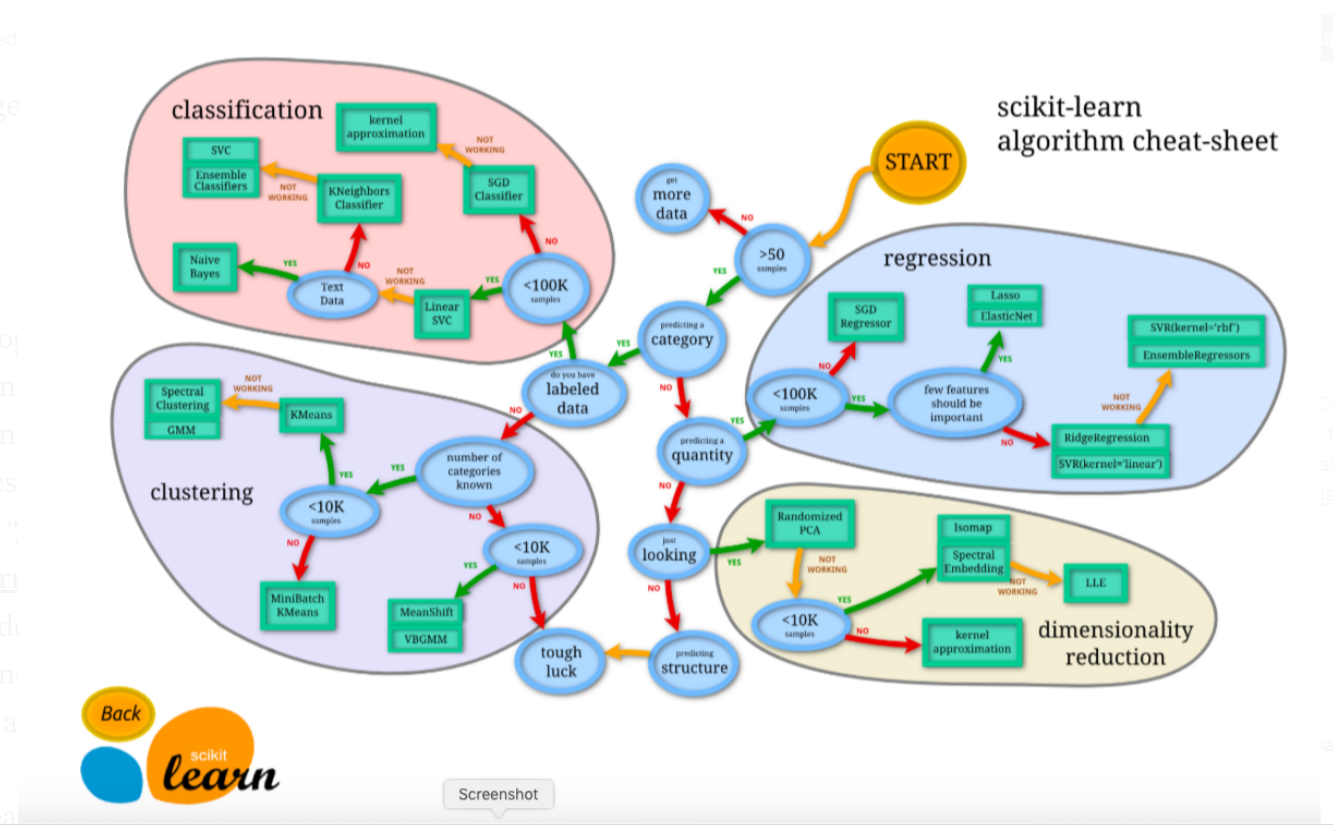

## Scikit-Learn Design

Scikit-Learn’s API is remarkably well designed. These are the main design principles : 

### Consistency
All objects share a consistent and simple interface: 

1) Estimators

2) Transformers

3) Predictors

### Estimators

Any object that can **estimate** some parameters based on a dataset is called an **estimator**  (e.g., an imputer  is an estimator). 

The estimation itself is performed by the **fit()**  method, and it takes only a dataset as a parameter (or two for supervised learning algorithms; the second dataset contains the labels).

### Transformers 

Some estimators (such as an imputer ) can also **transform a dataset**; these are called transformers . 

Once again, the API is simple: the transformation is performed  by the **transform()**  method with the dataset to transform as a parameter. 

It returns the **transformed dataset**. 

This transformation generally relies on the **learned parameters**, as is the case for an imputer . 

All transformers also have a convenience method called **fit_transform()**  that is equivalent to calling **fit()**  and then **transform()**  



### Predictors 

Finally, some estimators, given a dataset, are capable of making **predictions**; they are called **predictors** . 

For example, the **LinearRegression**  model in the previous chapter was a predictor: given a country’s GDP per capita, it predicted life satisfaction. 

A **predictor** has a **predict()**  method that takes a dataset of new instances and returns a dataset of corresponding predictions. 

It also has a **score()**  method that measures the quality of the predictions, given a test set 

## Custom Transformers

Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such as custom cleanup operations or combining specific attributes.

All you need to do is create a class and implement three methods: 

fit() (returning self ), transform() , and fit_transform()

You can get the last one for free by simply adding **TransformerMixin**  as a base class. If you add **BaseEstimator**  as a base class, you will also get two extra methods ( get_params()  and set_params() ) that will be useful for automatic hyperparameter tuning.

Let's create a custom transformer to add extra attributes:

For example, here is a small transformer class that adds the combined attributes we discussed earlier:

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In this example the transformer has one hyperparameter, **add_bedrooms_per_room** , set to **True**  by default (it is often helpful to provide sensible defaults). This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not. More generally, you can add a hyperparameter to gate any data preparation step that you are not 100% sure about. The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving you a lot of time).

Note that I hard coded the indices (3, 4, 5, 6) for concision and clarity in the book, but it would be much cleaner to get them dynamically, like this:

In [63]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

Also, `housing_extra_attribs` is a NumPy array, we've lost the column names (unfortunately, that's a problem with Scikit-Learn). To recover a `DataFrame`, you could run this:

In [64]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

longitude latitude housing_median_age total_rooms total_bedrooms  \
12655   -121.46    38.52               29.0      3873.0          797.0   
15502   -117.23    33.09                7.0      5320.0          855.0   
2908    -119.04    35.37               44.0      1618.0          310.0   
14053   -117.13    32.75               24.0      1877.0          519.0   
20496    -118.7    34.28               27.0      3536.0          646.0   

      population households median_income ocean_proximity rooms_per_household  \
12655     2237.0      706.0        2.1736          INLAND            5.485836   
15502     2015.0      768.0        6.3373      NEAR OCEAN            6.927083   
2908       667.0      300.0         2.875          INLAND            5.393333   
14053      898.0      483.0        2.2264      NEAR OCEAN            3.886128   
20496     1837.0      580.0        4.4964       <1H OCEAN            6.096552   

      population_per_household  
12655                 3.168555  
15502                 2.623698  
2908                  2.223333  
14053                 1.859213  
20496                 3.167241

## Feature Scaling

One  of the most important transformations you need to apply to your data is feature scaling.

There  are two common ways to get all attributes to have the same scale: min-max scaling  and standardization.

Min-max scaling (many people call this normalization ) is the simplest: values are shifted and rescaled so that they end up ranging from 0 to 1.

Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1)


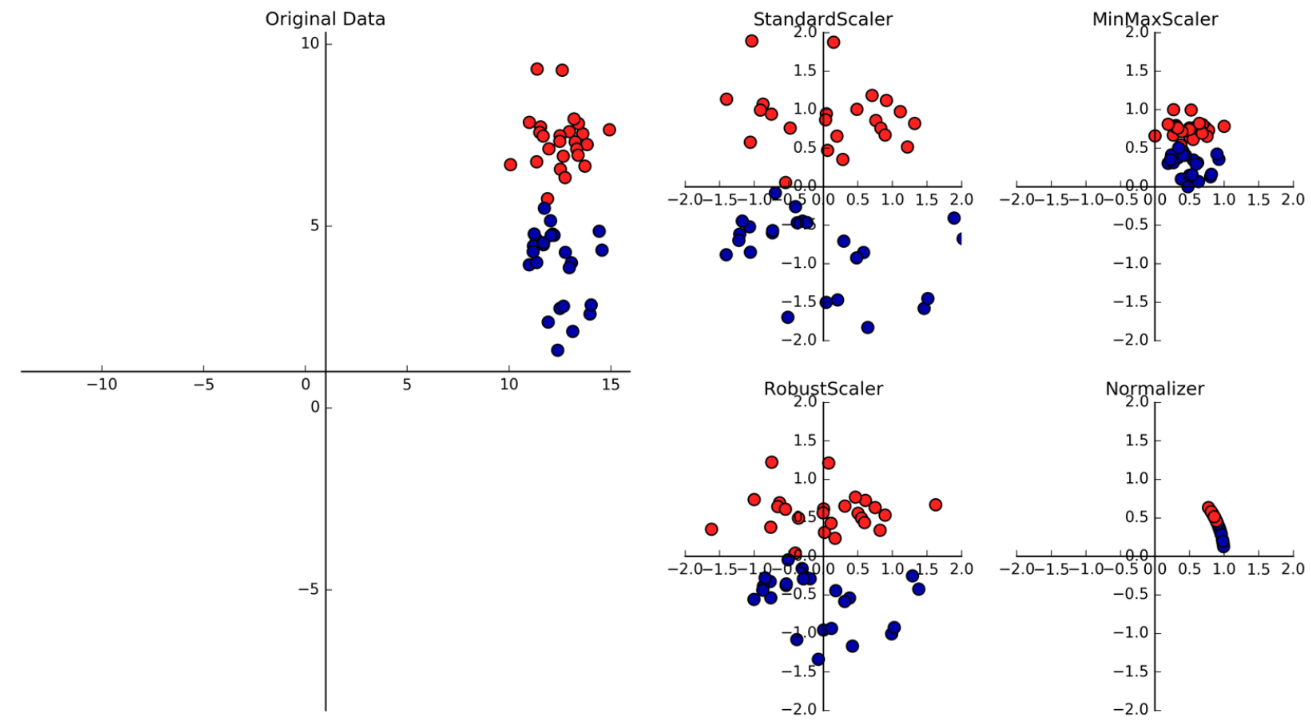

## Transformation Pipelines

As  you can see, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the Pipeline  class to help with such sequences of transformations. Here is a small pipeline for the numerical attributes:

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

The Pipeline  constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers (i.e., they must have a **fit_transform()**  method)

In [66]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column. In version 0.20, Scikit-Learn introduced the ColumnTransformer  for this purpose, and the good news is that it works great with pandas DataFrames. Let’s use it to apply all the transformations to the housing data:

In [67]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

First we import the **ColumnTransformer**  class, next we get the list of **numerical column names** and the list of **categorical column names**, and then we construct a **Colum nTransformer** . The constructor requires a list of tuples, where each tuple contains a **name**, a **transformer**, and a **list of names** (or indices) of columns that the transformer should be applied to. 

In this example, we specify that the numerical columns should be transformed using the num_pipeline  that we defined earlier, and the categorical columns should be transformed using a OneHotEncoder . Finally, we apply this ColumnTransformer  to the housing data: it applies each transformer to the appropriate columns and concatenates the outputs along the second axis (the transformers must return the same number of rows).

In [68]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [69]:
housing_prepared.shape

(16512, 16)

For reference, here is the old solution based on a `DataFrameSelector` transformer (to just select a subset of the Pandas `DataFrame` columns), and a `FeatureUnion`:

In [70]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:

In [71]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [72]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [73]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

The result is the same as with the `ColumnTransformer`:

In [74]:
np.allclose(housing_prepared, old_housing_prepared)

True

# Select and Train a Model

At last! 

1) You <font color='green'> **framed** </font> the problem,

2) You <font color='green'> **got the data** </font> and explored it, 

3) You <font color='green'> **sampled** a **training set** and a **test set** </font>,

4) You wrote <font color='green'> **transformation pipelines** </font> to clean up and prepare your data for Machine Learning algorithms automatically. 

You are now ready to **select and train a Machine Learning model**.

## Training and Evaluating on the Training Set

The good news is that thanks to all these previous steps, things are now going to be much simpler than you might think. Let’s first train a Linear Regression model, like we did in the previous chapter:

In [75]:
from sklearn.linear_model import LinearRegression

# make a model
lin_reg =  LinearRegression()

#train the model
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

Done! You now have a working Linear Regression model. Let’s try it out on a few instances from the training set:

In [76]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))


Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


Compare against the actual values:

In [77]:
print("Labels:", list(some_labels))


Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [78]:
some_data_prepared


array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

It works, although the predictions are not exactly accurate (e.g., the first prediction is off by close to 40%!). Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error()  function:

In [79]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


68627.87390018745

**Note**: since Scikit-Learn 0.22, you can get the RMSE directly by calling the `mean_squared_error()` function with `squared=False`.

In [80]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae


49438.66860915801

This is better than nothing, but clearly not a great score: most **districts’ median_housing_values**  range between \$ 120,000  and \$ 265,000, so a typical prediction error of \$ 68,628 is not very satisfying. 

This is an example of a model **underfitting** the training data. When this happens it can **mean** that the **features do not provide enough information**  to make good predictions, or that the **model is not powerful enough**. 

As we saw in the previous chapter, the main ways to **fix underfitting** are to select a **more powerful model**, to feed the training algorithm with better features, or to **reduce the constraints on the model**. 

This model is not **regularized**, which rules out the last option. You could try to **add more features** (e.g., the log of the population).

But **first** let’s try a **more complex model** to see how it does.

Let’s train a **DecisionTreeRegressor** . This is a **powerful** model, capable of **finding complex nonlinear relationships** in the data.

In [81]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor(random_state=42)

In [82]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


0.0

### Wait, What!?

No **error** at all? Could this model really be absolutely perfect? 

Of course, it is much more likely that the model has **baddly overfit** the data.

As we saw earlier, you don't want to **touch** the **test set** until you are ready to lunch a model you are confident about.

You need to use part of the **training set** for training and part of it for **model validation**. 

## Better Evaluation Using Cross-Validation

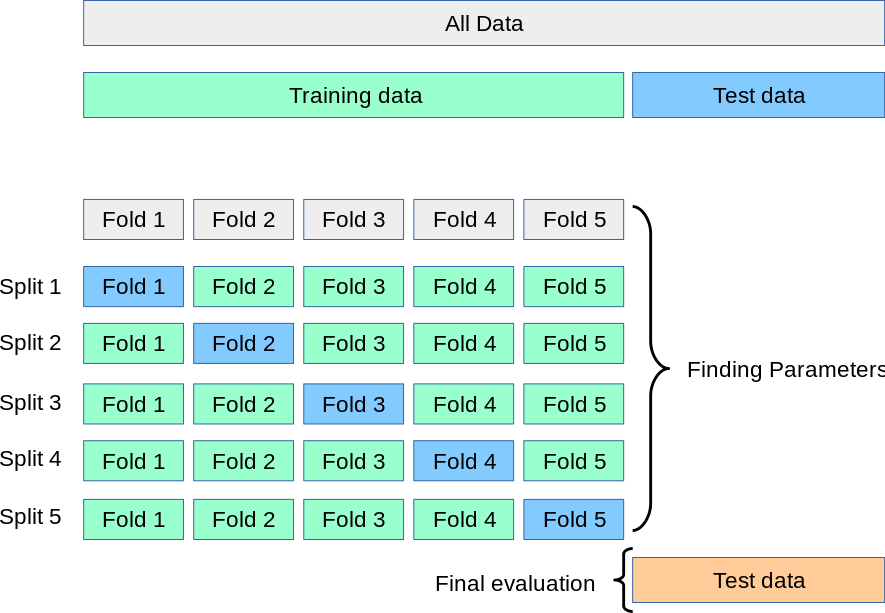

A  great alternative is to use **Scikit-Learn’s K-fold cross-validation**  feature. The following code randomly **splits** the training set into **10 distinct subsets** called **folds**, then it trains and evaluates the Decision Tree model **10 times**, picking **a different fold** for evaluation every time and training on the **other 9 folds**. The result is an array containing the **10 evaluation scores**:

In [83]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [84]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)


Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


Now the Decision Tree doesn’t look as good as it did earlier. 

In fact, it seems to perform **worse than** the **Linear Regression model**! 

Notice that **cross-validation** allows you to get not only an estimate of the performance of your model, but also a measure of how **precise** this estimate is (i.e., its standard deviation). 

The **Decision Tree** has a score of approximately 71,407, generally ±2,439. You would not have this information if you just used one validation set.

Let’s compute the same scores for the **Linear Regression model** just to be sure:

In [85]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180657


That’s right: the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

Let's try one last model now: **RandomForestRegressor**

As we will see in Chapter 7 , Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. Building a model on top of many other models is called Ensemble Learning , and it is often a great way to push ML algorithms even further. We will skip most of the code since it is essentially the same as for the other models:


**Note**: we specify `n_estimators=100` to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22 (for simplicity, this is not shown in the book).

In [86]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor(random_state=42)

In [87]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


18650.698705770003

You should save every model you experiment with so that you can come back easily to any model you want. 

Make sure you **save** both the **hyperparameters** and the **trained parameters**, as well as the cross-validation scores and perhaps the actual predictions as well.

In [88]:
import  joblib
joblib . dump ( my_model ,  "my_model.pkl" )

# and later... 
my_model_loaded  =  joblib . load ( "my_model.pkl" )


NameError: name 'my_model' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

forest_reg1 = RandomForestRegressor(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_reg1, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)


**Wow**, this is much better: **Random Forests** look very promising. 

However, note that the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. 

Possible solutions for **overfitting** are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data.

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse


# Fine-Tune Your Model

Let’s assume that you now have a shortlist of promising models. You now need to fine-tune them. Let’s look at a few ways you can do that.



## Grid Search

**One option** would be to fiddle with the hyperparameters **manually**, until you find a great combination of hyperparameter values. 
This would be very **tedious work**, and you may not have time to explore many combinations. 

Instead,  you should get Scikit-Learn’s **GridSearchCV**  to search for you. 

All you need to do is tell it **which hyperparameters** you want it to **experiment with** and **what values** to try out, and it will use **cross-validation** to **evaluate all the possible combinations** of **hyperparameter values**. 

For example, the following code searches for the best combination of hyperparameter values for the **RandomForestRegressor** :

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
# make the learning model
forest_reg = RandomForestRegressor(random_state=42)
# make the GridSearch
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search.fit(housing_prepared, housing_labels)


When you have no idea what value a hyperparameter should have, a simple approach is to try out consecutive powers of 10 (or a smaller number if you want a more fine-grained search, as shown in this example with the n_estimators  hyperparameter).

This **param_grid**  tells **Scikit-Learn** to first evaluate all **3 × 4 = 12** combinations of **n_estimators**  and **max_features**  hyperparameter values specified in the first dict (don’t worry about what these hyperparameters mean for now; they will be explained in Chapter 7 ), then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict , but this time with the **bootstrap**  hyperparameter set to **False**  instead of True  (which is the default value for this hyperparameter)


The best hyperparameter combination found:

In [ ]:
grid_search.best_params_


In [ ]:
grid_search.best_estimator_


Let's look at the score of each hyperparameter combination tested during the grid search:

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    

In [ ]:
pd.DataFrame(grid_search.cv_results_)


## Randomized Search

The **grid search** approach is **fine** when you are **exploring relatively few combinations**, like in the previous example, but when the hyperparameter **search space is large**, it is often preferable to use **RandomizedSearchCV**  instead. 

This **class** can be used in much the same way as the **GridSearchCV  class**, but instead of trying out **all possible combinations**, it **evaluates** a given number of **random combinations** by **selecting** a **random value** for each hyperparameter at **every iteration**.

This approach has **two main benefits**: 

• If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach). • Simply by setting the number of iterations, you have more control over the computing budget you want to allocate to hyperparameter search.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)


In [ ]:
# print the results
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    

## Analyze the Best Models and Their Errors

You will often gain good insights on the problem by inspecting the best models. For example, the RandomForestRegressor  can indicate the relative importance of each attribute for making accurate predictions:

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

Let’s display these importance scores next to their corresponding attribute names:

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

With this information, you may want to try dropping some of the less useful features (e.g., apparently only one ocean_proximity  category is really useful, so you could try dropping the others). You should also look at the specific errors that your system makes, then try to understand why it makes them and what could fix the problem (adding extra features or getting rid of uninformative ones, cleaning up outliers, etc.).

## Evaluate Your System on the Test Set

Now is the time to evaluate the final model on the **test set**. There is nothing special about this process; just get the predictors and the labels from your test set, run your **full_pipeline  to transform the data** (call transform() , **not fit_transform()** —you do not want to fit the test set!), and evaluate the final model on the test set:

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)


In [ ]:
final_rmse

Although we still have underfitting, we don't have overfitting.

We can compute a 95% confidence interval for the test RMSE:

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

We could compute the interval manually like this:

In [ ]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

Alternatively, we could use a z-scores rather than t-scores:

In [ ]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

If you did a lot of hyperparameter tuning, the performance will usually be slightly worse than what you measured using cross-validation (because your system ends up fine-tuned to perform well on the validation data and will likely not perform as well on unknown datasets). It is not the case in this example, but when this happens you must resist the temptation to tweak the hyperparameters to make the numbers look good on the test set; the improvements would be unlikely to generalize to new data. Now comes the project prelaunch phase: you need to present your solution (highlighting what you have learned, what worked and what did not, what assumptions were made, and what your system’s limitations are), document everything, and create nice presentations with clear visualizations and easy-to-remember statements (e.g., “the median income is the number one predictor of housing prices”). In this California housing example, the final performance of the system is not better than the experts’ price estimates, which were often off by about 20%, but it may still be a good idea to launch it, especially if this frees up some time for the experts so they can work on more interesting and productive tasks.

## Launch, Monitor, and Maintain Your System

Perfect, you got approval to launch! You now need to get your solution ready for production (e.g., polish the code, write documentation and tests, and so on). Then you can deploy your model to your production environment.

<div>
    <center>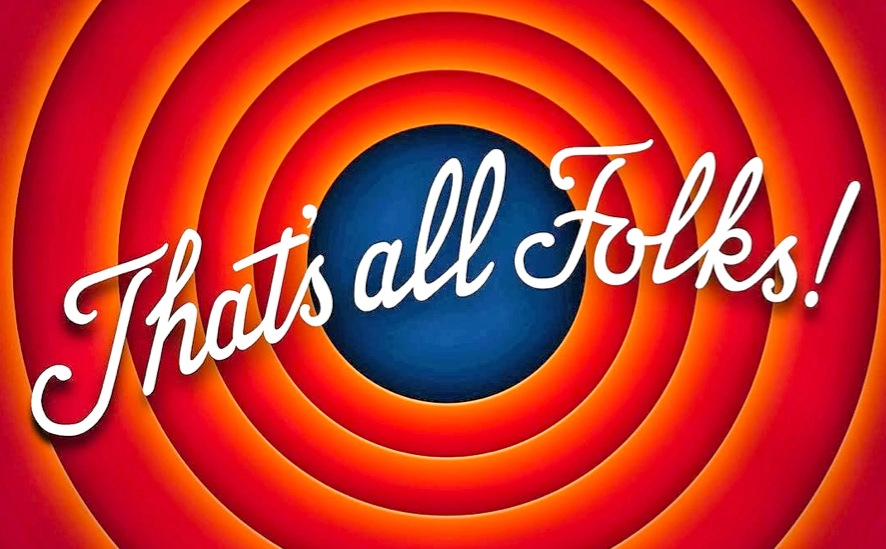</center>
</div>

<div>
    <center>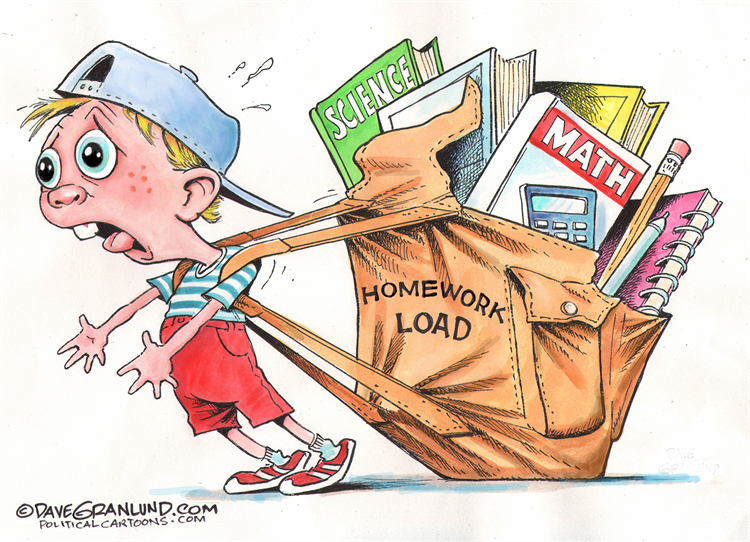</center>
</div>

Congratulations! You already know quite a lot about Machine Learning. :)